https://classroom.udacity.com/nanodegrees/nd002-cn-advanced-vip/parts/4ec06ac9-9e53-42c2-a53d-3b4ec9d7e25e/modules/1a94ecfd-3bf9-4490-909b-0c651c555895/lessons/1be3e033-6aae-4e6f-8806-bca80a652222/concepts/54271309-d408-4178-bf0a-d93b39ed94da

In [1]:
import time
import urllib
import bs4
import requests

In [2]:
start_url = "https://en.wikipedia.org/wiki/Special:Random"
target_url = "https://en.wikipedia.org/wiki/Philosophy"

In [3]:
def find_first_link(url):
    response = requests.get(url)
    html = response.text
    soup = bs4.BeautifulSoup(html, "html.parser")

    # This div contains the article's body
    # (June 2017 Note: Body nested in two div tags)
    content_div = soup.find(id="mw-content-text").find(class_="mw-parser-output")

    # stores the first link found in the article, if the article contains no
    # links this value will remain None
    article_link = None

    # Find all the direct children of content_div that are paragraphs
    for element in content_div.find_all("p", recursive=False):
        # Find the first anchor tag that's a direct child of a paragraph.
        # It's important to only look at direct children, because other types
        # of link, e.g. footnotes and pronunciation, could come before the
        # first link to an article. Those other link types aren't direct
        # children though, they're in divs of various classes.
        if element.find("a", recursive=False):
            article_link = element.find("a", recursive=False).get('href')
            break

    if not article_link:
        return

    # Build a full url from the relative article_link url
    first_link = urllib.parse.urljoin('https://en.wikipedia.org/', article_link)

    return first_link

def continue_crawl(search_history, target_url, max_steps=25):
    if search_history[-1] == target_url:
        print("We've found the target article!")
        return False
    elif len(search_history) > max_steps:
        print("The search has gone on suspiciously long, aborting search!")
        return False
    elif search_history[-1] in search_history[:-1]:
        print("We've arrived at an article we've already seen, aborting search!")
        return False
    else:
        return True

article_chain = [start_url]

while continue_crawl(article_chain, target_url):
    print(article_chain[-1])

    first_link = find_first_link(article_chain[-1])
    if not first_link:
        print("We've arrived at an article with no links, aborting search!")
        break

    article_chain.append(first_link)

    time.sleep(2) # Slow things down so as to not hammer Wikipedia's servers
    

https://en.wikipedia.org/wiki/Special:Random


ConnectionError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Special:Random (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1122e9cc0>: Failed to establish a new connection: [Errno 60] Operation timed out',))

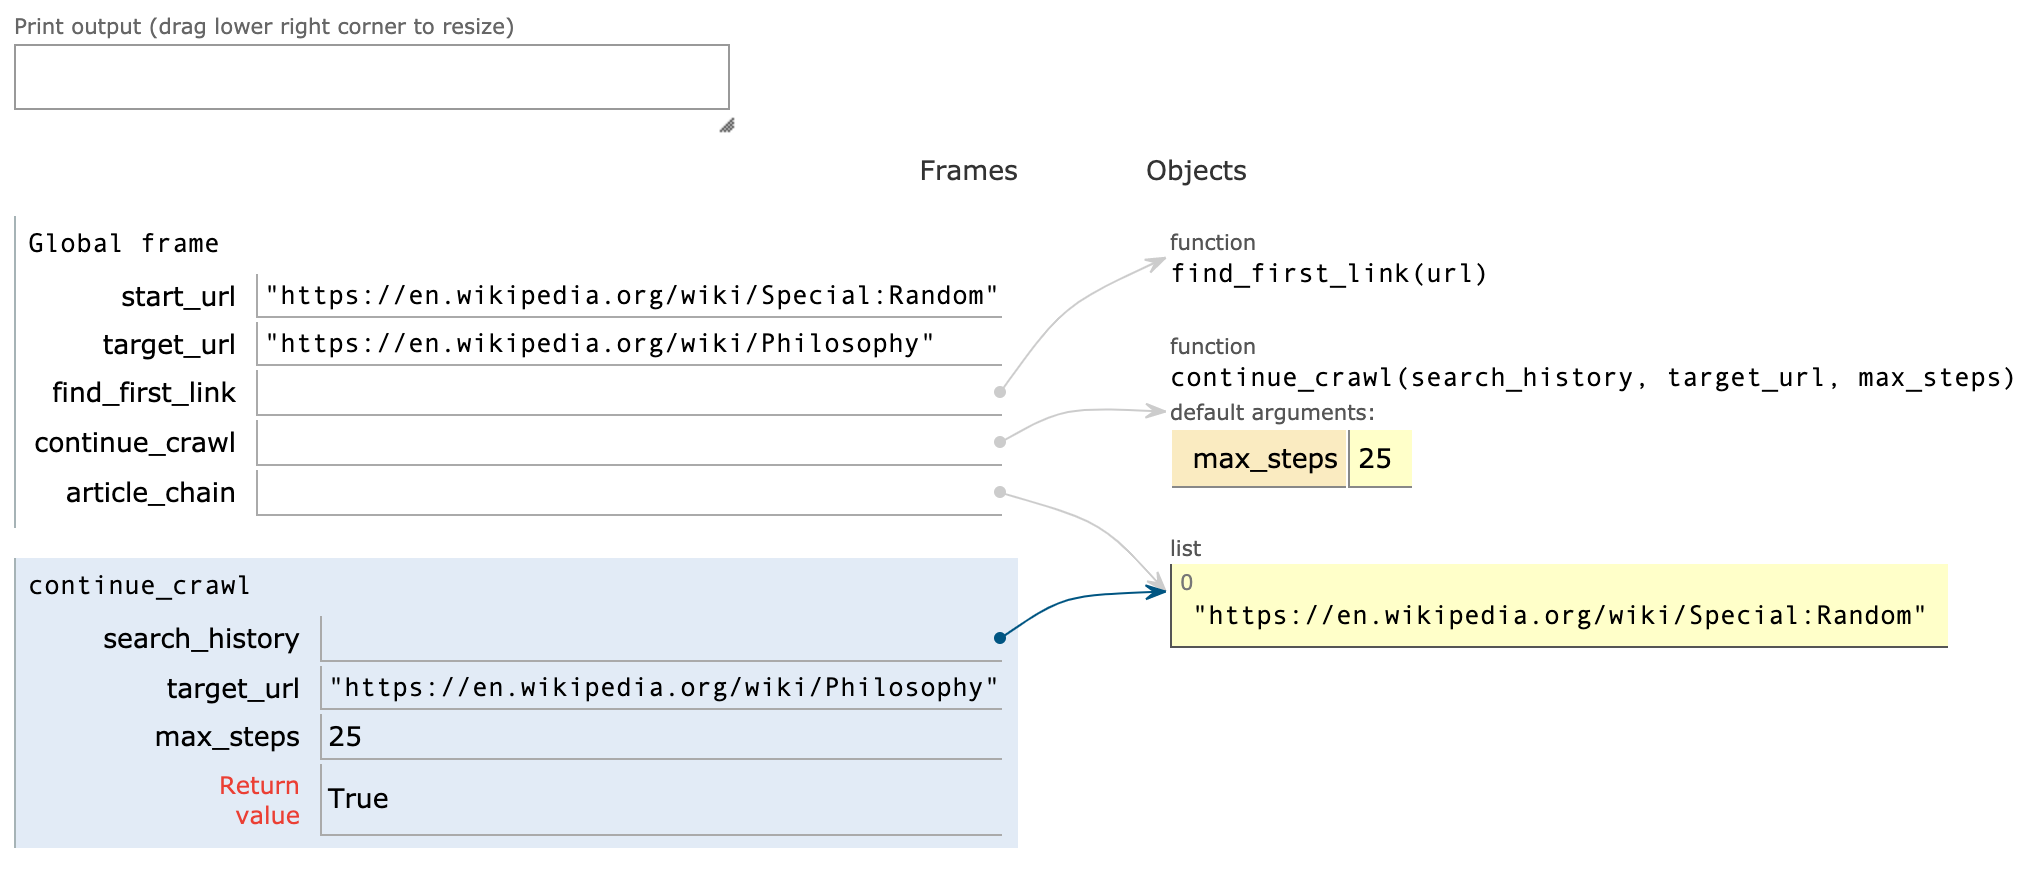